In [ ]:
!pip install lightkurve

In [18]:
import lightkurve as lk
import numpy as np

# Define the Plavchan periodogram function (as provided earlier)
def plavchan_periodogram(time, flux, trial_periods, num_outliers=10, phase_box_size=0.05):
    """
    Plavchan Periodogram implementation.

    Parameters:
        time (array-like): Time values of the time series data.
        flux (array-like): Corresponding flux or measurement values of the time series data.
        trial_periods (array-like): Array of trial periods to test for periodicity.
        num_outliers (int, optional): Number of worst-fitting data points to consider. Default is 10.
        phase_box_size (float, optional): Width of the phase box for smoothing. Default is 0.05.

    Returns:
        periodogram (numpy.ndarray): Array of periodogram power values for each trial period.
    """
    periodogram = []
    for period in trial_periods:
        # Step 1: Phase Folding
        phase = (time % period) / period

        # Step 2: Smoothing (Box-Car Smoothing)
        smoothed_flux = []
        for i in range(len(phase)):
            # Compute the average flux within the phase box
            box_start = phase[i] - phase_box_size / 2
            box_end = phase[i] + phase_box_size / 2
            in_box = (phase >= box_start) & (phase <= box_end)
            smoothed_flux.append(np.mean(flux[in_box]))

        # Step 3: Computing the Difference
        squared_residuals = (flux - np.array(smoothed_flux))**2

        # Step 4: Minimization (using num_outliers worst-fitting data points)
        worst_fit_indices = np.argsort(squared_residuals)[-num_outliers:]
        normalization = np.sum(squared_residuals[worst_fit_indices])

        # Calculate the dynamical prior: smoothed flux curve used for comparison
        dynamical_prior = np.array(smoothed_flux)

        # Step 5: Compute the periodogram power for the current period
        power = normalization / np.sum(squared_residuals)
        periodogram.append(power)

    return np.array(periodogram)

# Download all available light curve files for the target 'Pi Mensae c' from TESS
lc = lk.search_lightcurvefile('Pi Mensae c', mission='TESS').download_all()

# Assuming you want to work with the first light curve (you can choose a different one if needed)
lc = lc[0].PDCSAP_FLUX.normalize()

# Extract time_data and flux_data from the light curve and convert to 1D NumPy arrays
time_data = lc.time.value.flatten()
flux_data = lc.flux.value.flatten()

# Generate an array of trial periods to test (e.g., from 0.1 to 30.0 days)
trial_periods = np.linspace(0.1, 30.0, 100)

# Calculate the Plavchan periodogram using your custom function
periodogram_result = plavchan_periodogram(time_data, flux_data, trial_periods)

# Print or plot the periodogram results as needed
print(periodogram_result)

<ipython-input-18-e6f8714462cc>:50: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lc = lk.search_lightcurvefile('Pi Mensae c', mission='TESS').download_all()
<ipython-input-18-e6f8714462cc>:53: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc[0].PDCSAP_FLUX.normalize()


[0.02512022 0.0250148  0.02525076 0.02509208 0.0254051  0.02522198
 0.02552368 0.02509177 0.02579535 0.02518662 0.02601518 0.02566474
 0.0254729  0.0257547  0.02534272 0.0249722  0.02620423 0.02617078
 0.02552057 0.02569066 0.02557784 0.02572588 0.0258104  0.0258996
 0.02607933 0.02605831 0.02633492 0.02616675 0.02599563 0.02563711
 0.02560819 0.02583833 0.02626005 0.02657736 0.02630116 0.02602024
 0.02570627 0.02578041 0.02589446 0.02563489 0.02571924 0.02630851
 0.02623179 0.02579296 0.0258701  0.02593116 0.02620788 0.02627664
 0.02679724 0.02705066 0.02700436 0.02709135 0.02686035 0.0266325
 0.02601545 0.02576792 0.02568439 0.02574357 0.02567178 0.0255998
 0.02559219 0.02562845 0.02551628 0.02582355 0.02591522 0.02626764
 0.02654433 0.02649182 0.02646587 0.0263028  0.02633477 0.02609742
 0.02607422 0.02610208 0.02615945 0.02605205 0.02597753 0.02583725
 0.02553188 0.02598181 0.02633224 0.02655737 0.02657925 0.0266815
 0.02674623 0.02670459 0.02656133 0.02648225 0.02640811 0.02649092

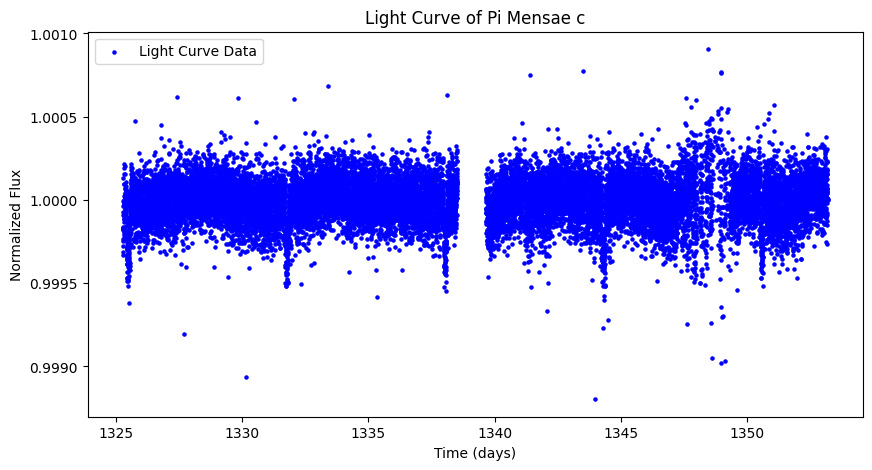

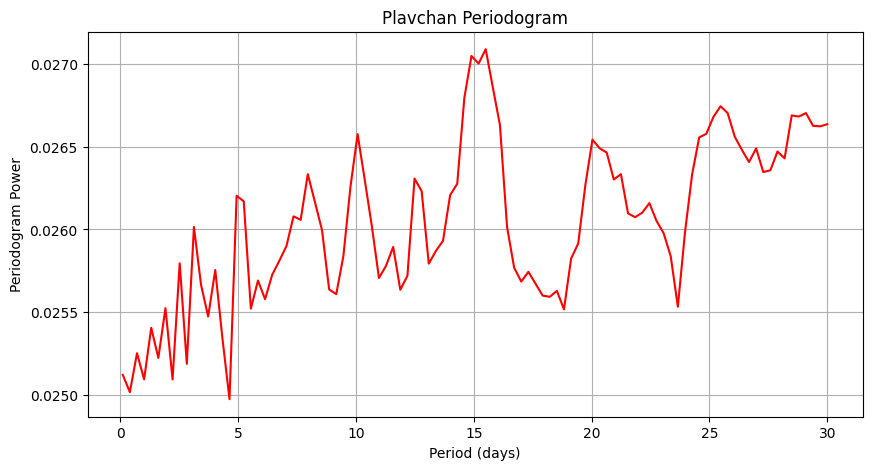

In [19]:
import matplotlib.pyplot as plt
# Plot the original light curve data
plt.figure(figsize=(10, 5))
plt.scatter(time_data, flux_data, s=5, color='blue', label='Light Curve Data')
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
plt.title('Light Curve of Pi Mensae c')
plt.legend()

# Plot the Plavchan periodogram results
plt.figure(figsize=(10, 5))
plt.plot(trial_periods, periodogram_result, color='red')
plt.xlabel('Period (days)')
plt.ylabel('Periodogram Power')
plt.title('Plavchan Periodogram')
plt.grid()

plt.show()